In [1]:
import pandas as pd
import re
from matplotlib import pyplot as plt

In [2]:
subscriber_data = pd.read_csv('input_and_output_connections.csv')

In [3]:
input_connections = subscriber_data.loc[subscriber_data['da'] == '192.168.250.1']

In [4]:
output_connections = subscriber_data.loc[subscriber_data['sa'] == '192.168.250.1']

In [5]:
input_connections_copy = input_connections

In [30]:
output_connections_copy = output_connections

In [6]:
for index, row in input_connections_copy.iterrows():
    ts_time = re.sub('\d\d\d\d-\d\d-\d\d ', '', row['ts'])
    input_connections_copy.at[index, 'ts'] = ts_time

In [31]:
for index, row in output_connections_copy.iterrows():
    ts_time = re.sub('\d\d\d\d-\d\d-\d\d ', '', row['ts'])
    output_connections_copy.at[index, 'ts'] = ts_time

In [15]:
total_input_bytes = total_output_bytes = 0
for index, row in input_connections.iterrows():
    total_input_bytes += row['ibyt']
    
for index, row in output_connections.iterrows():
    total_output_bytes += row['ibyt']
    
total_bytes = total_input_bytes + total_output_bytes
    
print(total_bytes)

6205168.0


In [18]:
total_kb = total_bytes / 1000

coeff = 0.5

total_price = 0

while (total_kb / 500 > 0):
    total_price += 500 * coeff
    total_kb -= 500
    coeff += 0.5

print(total_price)

22750.0


In [13]:
input_connections_copy.nlargest(20, 'ibyt')['ibyt']

5648    776016.0
6695     79608.0
1975     13290.0
516       2028.0
498       1666.0
500       1547.0
1931       992.0
502        923.0
5317       872.0
2984       864.0
504        817.0
4880       802.0
1658       792.0
1659       792.0
1660       783.0
4944       782.0
5580       781.0
3736       780.0
4866       760.0
4214       744.0
Name: ibyt, dtype: float64

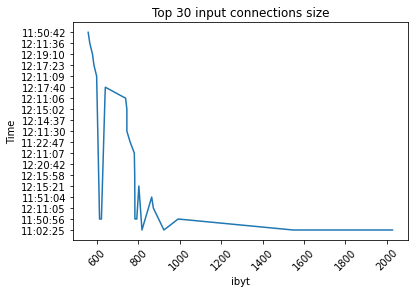

In [35]:
plt.title('Top 30 input connections size')
plt.xlabel('ibyt')
plt.ylabel('Time')
plt.xticks(rotation=45)
plt.plot(input_connections_copy[input_connections_copy.ibyt < 13000.00].nlargest(30, 'ibyt')['ibyt'], input_connections_copy[input_connections_copy.ibyt < 13000.00].nlargest(30, 'ibyt')['ts'])

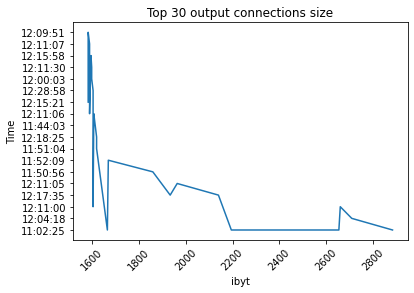

In [46]:
plt.title('Top 30 output connections size')
plt.xlabel('ibyt')
plt.ylabel('Time')
plt.xticks(rotation=45)
plt.plot(output_connections_copy[output_connections_copy.ibyt < 13000].nlargest(30, 'ibyt')['ibyt'], output_connections_copy[output_connections_copy.ibyt < 13000].nlargest(30, 'ibyt')['ts'])